In [1]:
from reusedistance import ReuseDistance
import main
import numpy as np

In [2]:
class TracedHamiltonian(main.Hamiltonian):
    def __init__(self, *args, **kwargs):
        self.trace = ReuseDistance()
        self.hashed_trace = ReuseDistance()
        self.distances = []
        self.hashed_distances = []
        super().__init__(*args, **kwargs)
        
    def reset_trace(self):
        self.trace = ReuseDistance()
        self.hashed_trace = ReuseDistance()
        self.distances = []
        self.hashed_distances = []
        
    def hash_record(self,i,j,k,l):
        p = min(i,k)
        r = max(i,k)
        t = p + (r*(r-1)/2)
        q = min(j,l)
        s = max(j,l)
        u = q + (s*(s-1)/2)
        v = min(t,u)
        w = max(t,u)
        return v + (w*(w-1)/2)
        
    def H_two_e(self, i, j, k, l):
        h = self.hash_record(i,j,k,l)
        d = self.trace.add_record((i,j,k,l))
        dh = self.hashed_trace.add_record(h)
        self.distances.append(d)
        self.hashed_distances.append(dh)
        return super().H_two_e(i,j,k,l)

In [36]:
fci_path = 'f2_631g.FCIDUMP'
wf_path = 'f2_631g.30det.wf'
N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)
main.Powerplant(lewis, psi_det).E(psi_coef)

-198.73878098910563

In [39]:
len(d_two_e_integral)

38668

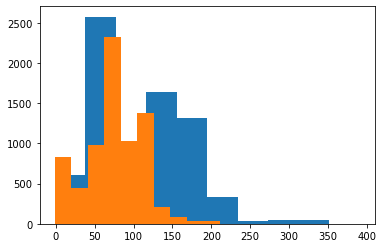

In [40]:
import matplotlib.pyplot as plt

plt.hist(lewis.distances)
plt.hist(lewis.hashed_distances)
plt.show()

In [42]:
fci_path='f2_631g.FCIDUMP'
wf_path='f2_631g.1det.wf'
E_ref =  -198.73029308564543
N_ord, E0, d_one_e_integral, d_two_e_integral = main.load_integrals(f"data/{fci_path}")
psi_coef, psi_det = main.load_wf(f"data/{wf_path}")
lewis = TracedHamiltonian(d_one_e_integral, d_two_e_integral, E0)

In [43]:
from main import selection_step

In [44]:
ds = []
dhs = []
for i in range(4):
    lewis.reset_trace()
    _, psi_coef, psi_det = selection_step(lewis, N_ord, psi_coef, psi_det, 5)
    ds.append(lewis.distances)
    dhs.append(lewis.hashed_distances)

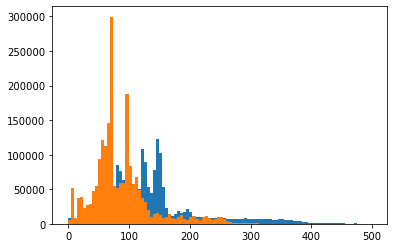

In [70]:
plt.hist(ds[0], bins=100,range=(-1, 500))
plt.hist(dhs[0], bins=100,range=(-1, 500))
plt.show()

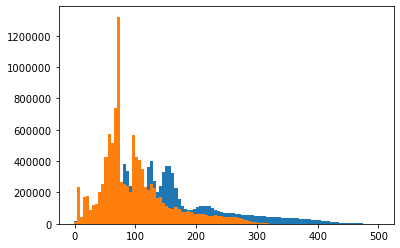

In [71]:
plt.hist(ds[1], bins=100,range=(-1, 500))
plt.hist(dhs[1], bins=100,range=(-1, 500))
plt.show()

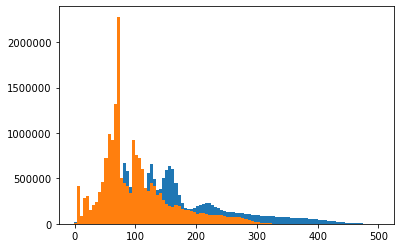

In [72]:
plt.hist(ds[2], bins=100,range=(-1, 500))
plt.hist(dhs[2], bins=100,range=(-1, 500))
plt.show()

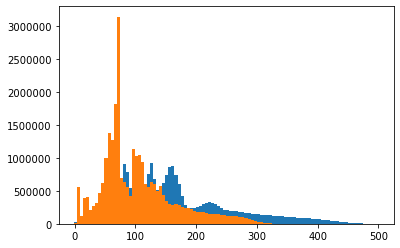

In [73]:
plt.hist(ds[3], bins=100,range=(-1, 500))
plt.hist(dhs[3], bins=100,range=(-1, 500))
plt.show()